In [54]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
#loading datsets

customers=pd.read_csv('Customers.csv')
products=pd.read_csv('Products.csv')
transactions=pd.read_csv('Transactions.csv')

In [3]:
#Checking for NULL values

In [4]:
customers.isna().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [6]:
products.isna().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [7]:
transactions.isna().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [8]:
#looking at the content 

In [9]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [10]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [11]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


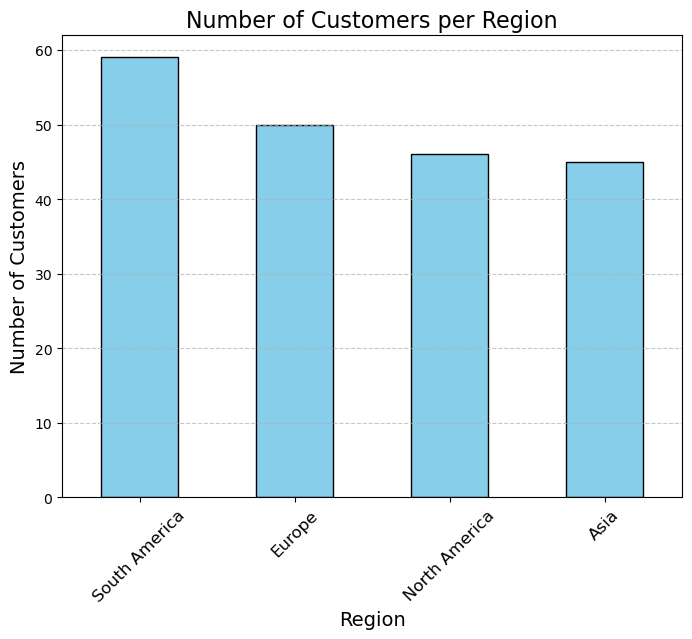

In [61]:
#Location-wise customer base size

region_counts=customers.Region.value_counts()

#plotting the data on barchart
plt.figure(figsize=(8, 6))
region_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Customers per Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [22]:
#perform detailed EDA we need category and Region in transactions dataframe

#so lets join them 

cust_and_trans = pd.merge(
    transactions, customers[['CustomerID', 'Region']], on='CustomerID', how='inner')

#now merge category from products

merged_data=pd.merge(
    cust_and_trans,products[['ProductID','Category']],on='ProductID',how='inner')

In [23]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Region,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Europe,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Asia,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Europe,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,South America,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Europe,Electronics


In [24]:
#change date fromat so that it will easy to perform operations on date 

merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

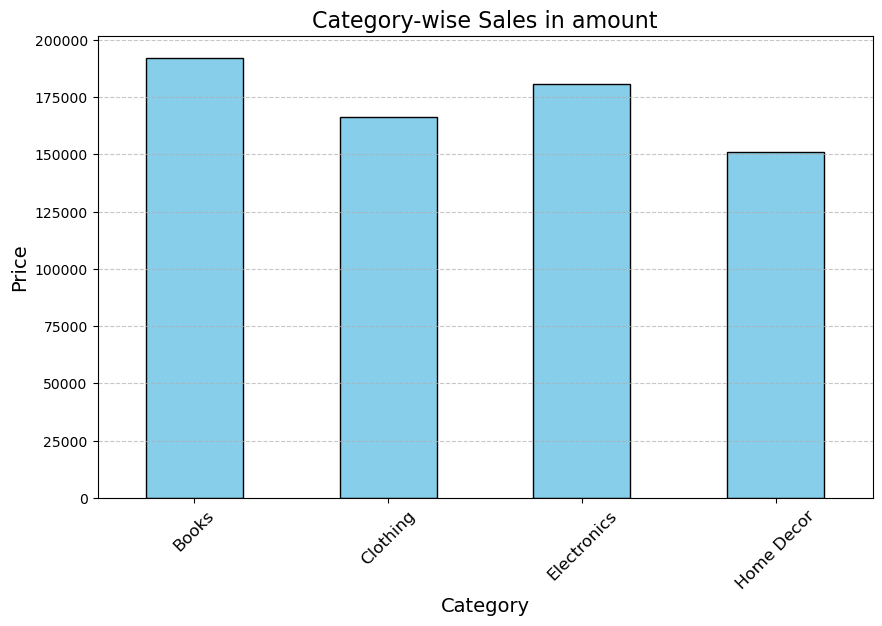

In [62]:
#calculating total sales based on different groups of category
category_sales=merged_data.groupby('Category')['TotalValue'].sum()


#plotting the data on barchart
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Category-wise Sales in amount', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


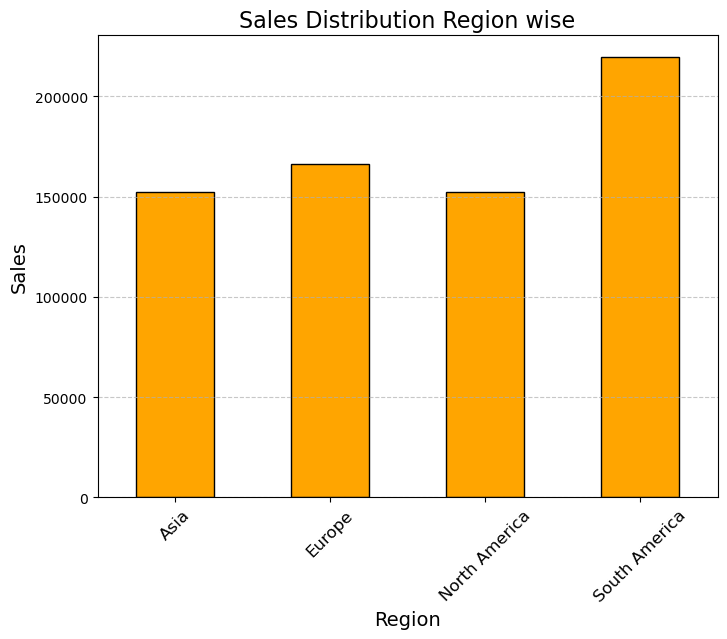

In [63]:
#calculating region total sales
region_sales=merged_data.groupby('Region')['TotalValue'].sum()


#plotting the data on barchart
plt.figure(figsize=(8, 6))
region_sales.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Sales Distribution Region wise', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

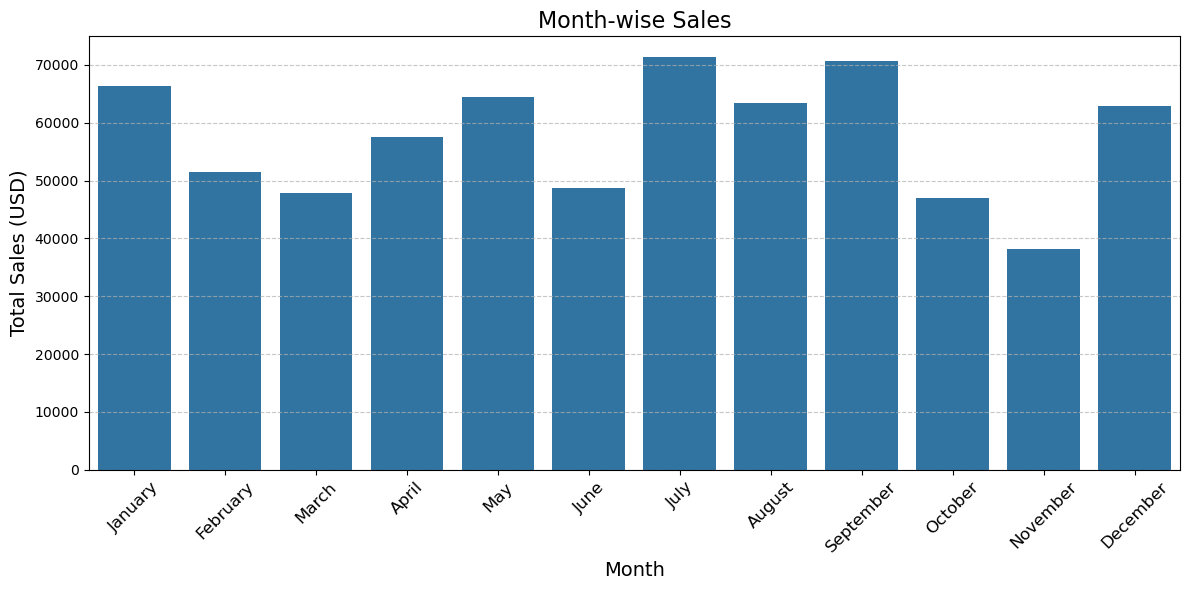

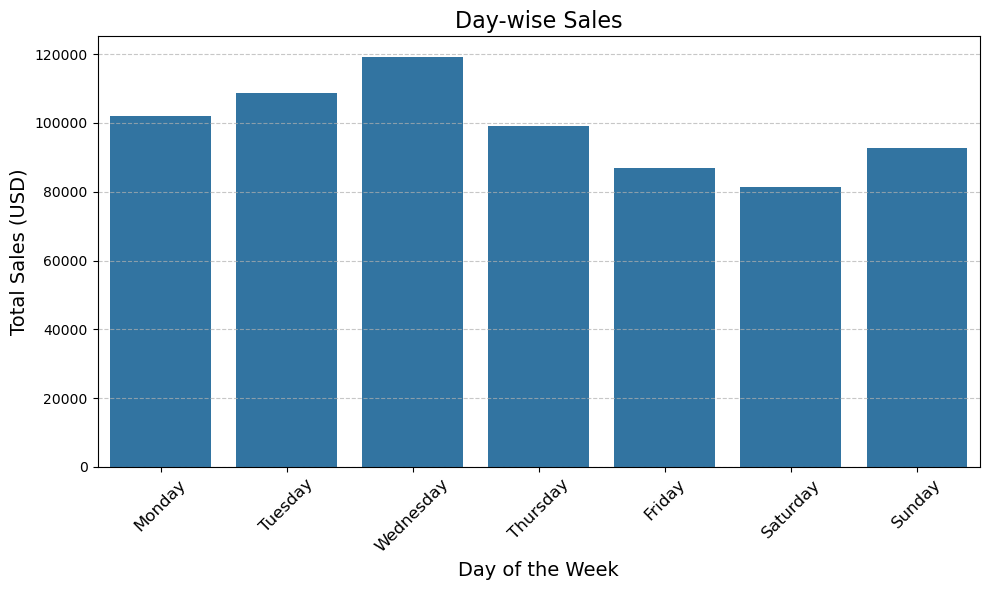

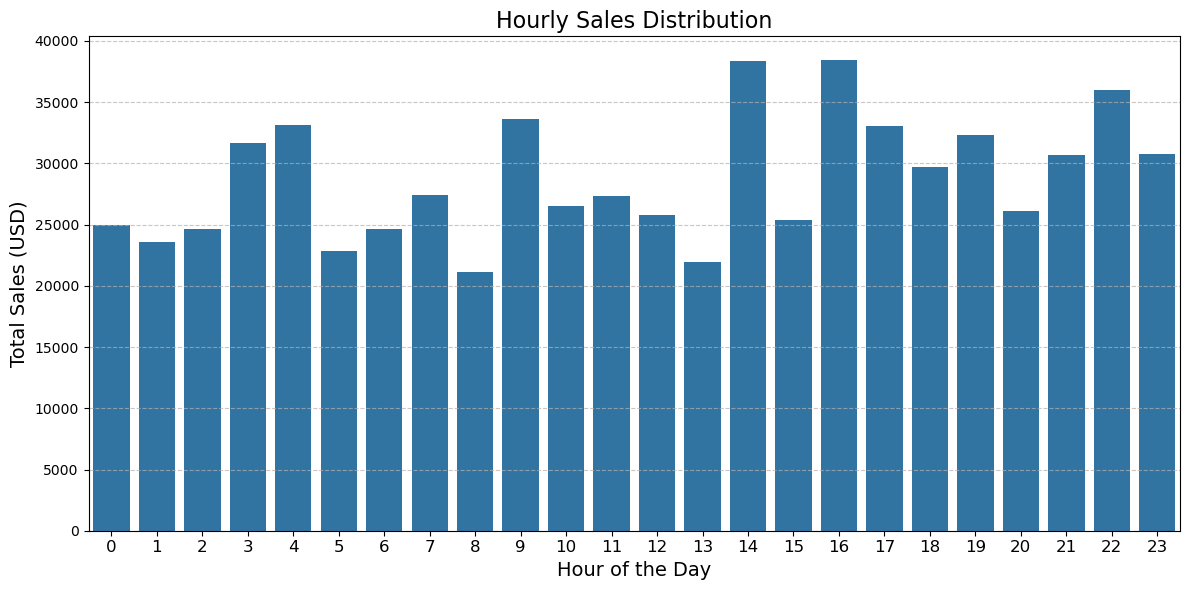

In [64]:
#transcation done by customers at what times like day , month , hour
merged_data['Month'] = merged_data['TransactionDate'].dt.month_name()
merged_data['Day'] = merged_data['TransactionDate'].dt.day_name()
merged_data['Hour'] = merged_data['TransactionDate'].dt.hour

# Group by Month to calculate total sales
month_sales = merged_data.groupby('Month')['TotalValue'].sum()

# Group by Day to calculate total sales
day_sales = merged_data.groupby('Day')['TotalValue'].sum()


# Group by hour to calculate total sales
hourly_sales = merged_data.groupby('Hour')['TotalValue'].sum()


# Reorder months and days for proper visualization
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot Month-wise Sales
plt.figure(figsize=(12, 6))
sns.barplot(x=month_sales.index, y=month_sales.values, order=month_order)
plt.title('Month-wise Sales', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales (USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot Day-wise Sales
plt.figure(figsize=(10, 6))
sns.barplot(x=day_sales.index, y=day_sales.values, order=day_order)
plt.title('Day-wise Sales', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Sales (USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Plot hourly sales
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values)
plt.title('Hourly Sales Distribution', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Sales (USD)', fontsize=14)
plt.xticks(range(0, 24), fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
